# Using the TransPyREnd wrappers

This notebook demonstrates how to use TransPyREnd with a set of fixed inputs, defining both the geological layers, their properties (e.g. diffusion and sorption coefficients), and the position of the repository. The only requirement is a folder with the parameter files. In this case we use the input files contained in the folder [input_parameters\\synth2](input_parameters\\synth2), containing a synthetic, simple set. The setup consists of a central layer that hosts the repository, and two layers to the top and bottom of it. These two layer have identical properties.

The nuclide inventory used is taken from GRS-289 (VSG), the release is configured to be instanteneous. 



## Import Python modules

In [1]:
import imp
import sys
from astropy import units as u
from transpyrend.wrapper.tools import ModelArgs, process_results, run_model, prepare_model_from_disk

## Enable Logging

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

## Select a set of input data

In [3]:
m = ModelArgs("../../input_parameters/synth2/model_parameters.yaml")

## Examine selected and default options in ModelArgs:

The ModelArgs object also takes care of a number of options for the numerics and the generated output.

In [4]:
print(m.__dict__)

{'solver': 'euler-backwards', 'inname': '../../input_parameters/synth2/model_parameters.yaml', 'outdir': None, 'realization': None, 'multiproc_driver': 'pathos', 'nprocs': 8, 'output': None, 'use_hdf5': False, 'save_output': False, 'observation_point': None, 'dry': False, 'profile': None, 'output_interval': None, 'round_down': False, 'nrunner': 1, 'in_memory': False, 'template': None, 'rid': 0}


## Run the model and return it to the notebook

In [5]:
model, mp = prepare_model_from_disk(m)
model, mp = run_model(m, model, mp)
# can also be done in one step: model, mp = prepare_and_run_model(m, model, mp)

INFO:root:Reading parameters
INFO:root:Snapping grid to units
INFO:root:Building Model
INFO:root:Using Bateman solution: Setting hl_limit=10
INFO:root:Running Model - this might take a while...
INFO:root:Inventory is at reference year 2075
INFO:root:using maximum timesteps of:
INFO:root:	286.4 yr for submodel#0 with species ['Sr-90', 'Cs-137']
INFO:root:	930.0 yr for submodel#1 with species ['Sm-151', 'Ni-63']
INFO:root:	4180.0 yr for submodel#2 with species ['Ag-108m', 'Ho-166m']
INFO:root:	35000.0 yr for submodel#3 with species ['Mo-93', 'C-14']
INFO:root:	48207.0 yr for submodel#4 with species ['Nb-94', 'Ni-59']
INFO:root:	29025.2 yr for submodel#5 with species ['Ca-41', 'Tc-99']
INFO:root:	48207.0 yr for submodel#6 with species ['Sn-126', 'Cl-36']
INFO:root:	48207.0 yr for submodel#7 with species ['Se-79', 'Zr-93']
INFO:root:	1789.6 yr for submodel#8 with species ['Be-10', 'Cs-135']
INFO:root:	48207.0 yr for submodel#9 with species ['Pd-107', 'I-129']
INFO:root:	115.5 yr for submod

## Make a figure with the final concentrations along the profile

This creates an overview plot to inspect the results.

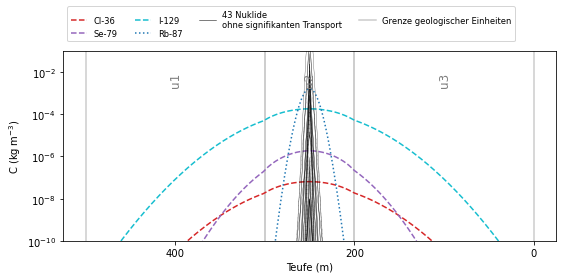

In [6]:
fig, axs = model.plot_overview_c_x(figsize=(8, 4))

## Process the results and save to output files

To calculate quantities like the transport length and generate other types of input, this function can be used. The log provides useful (human-readable) output.

In [7]:
results = process_results(m, model, mp)

INFO:root:calculating yearly rates from snapshots
INFO:root:calculating yearly rates from snapshots
INFO:root:Calculated transport lengths are [38.34695642 53.68286058 10.         14.         38.73035763 53.9897821
 10.         14.        ] m
INFO:root:Calculated transport length is 53.99 m to the right for total amount
INFO:root:maximum total rate at location of maximum transport length is 7.86e-11 1 / yr (left)                   and 7.43e-11 1 / yr (right)
